# 행정구별 확진자와 접종자 퍼센트 비교

In [58]:
import pandas as pd

# 행정구역별 백신접종자 수, 총 인구수, 확진자 수 데이터를 사용했다.
vaccine = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/전처리 후/vaccine.csv', encoding = 'utf-8')
infected = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/전처리 후/행정구별 확진자 수.csv', encoding = 'cp949')
population = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/전처리 후/population.csv', index_col = 0)

population

,행정구역별,합계
0,강남구,395047
1,강동구,341369
2,강북구,217786
3,강서구,432705
4,관악구,389615
5,광진구,273011
6,구로구,309844
7,금천구,184453
8,노원구,377568
9,도봉구,230054


In [59]:
population.rename(columns = {'행정구역별':'행정구', '합계':'총 인구수'}, inplace = True)
population.set_index('행정구')

,총 인구수
행정구,
강남구,395047
강동구,341369
강북구,217786
강서구,432705
관악구,389615
광진구,273011
구로구,309844
금천구,184453
노원구,377568


In [60]:
infected.rename(columns = {'지역':'행정구', '합계':'총 확진자 수'}, inplace = True)

In [61]:
vaccine.drop('Unnamed: 0', axis = 'columns', inplace = True)

In [62]:
vaccine.rename(columns = {'1회차_누적' : '1회 접종', '완료_누적' : '접종완료'}, inplace = True)
vaccine.set_index('행정구')

,1회 접종,접종완료
행정구,,
강남구,285976,163555
강동구,258219,143925
강북구,179060,103093
강서구,320366,184156
관악구,257214,146272
광진구,194322,105304
구로구,238427,132014
금천구,153226,74447
노원구,299880,168782


In [71]:
vac_infect = pd.concat([infected['행정구'], infected['총 확진자 수'], vaccine['접종완료'], population['총 인구수']], axis = 1)
vac_infect

,행정구,총 확진자 수,접종완료,총 인구수
0,강남구,4871,163555,395047
1,강동구,2423,143925,341369
2,강북구,1667,103093,217786
3,강서구,2290,184156,432705
4,관악구,3413,146272,389615
5,광진구,2217,105304,273011
6,구로구,2226,132014,309844
7,금천구,1209,74447,184453
8,노원구,2443,168782,377568
9,도봉구,1554,107951,230054


In [93]:
# 3개의 데이터를 합치고, 확진률, 접종률(백분율)을 계산해 보았다.
# 접종/확진 수치는 확진자 대비 접종이 얼만큼 이루어 졌는가 비교하기 위한 수치이다.
# 수치가 작으면 확진자수가 비교적 많거나 접종자 수가 적다는 것을 의미한다. 
vac_infect['확진률'] = round((vac_infect['총 확진자 수'] / vac_infect['총 인구수']) * 100, 1)
vac_infect['접종률'] = round((vac_infect['접종완료'] / vac_infect['총 인구수']) * 100,1)
vac_infect['접종/확진'] = round(vac_infect['접종완료']/vac_infect['총 확진자 수'])
vac_infect

,총 확진자 수,접종완료,총 인구수,확진률,접종률,접종/확진
행정구,,,,,,
강남구,4871,163555,395047,1.2,41.4,34.0
강동구,2423,143925,341369,0.7,42.2,59.0
강북구,1667,103093,217786,0.8,47.3,62.0
강서구,2290,184156,432705,0.5,42.6,80.0
관악구,3413,146272,389615,0.9,37.5,43.0
광진구,2217,105304,273011,0.8,38.6,47.0
구로구,2226,132014,309844,0.7,42.6,59.0
금천구,1209,74447,184453,0.7,40.4,62.0
노원구,2443,168782,377568,0.6,44.7,69.0


<BarContainer object of 5 artists>

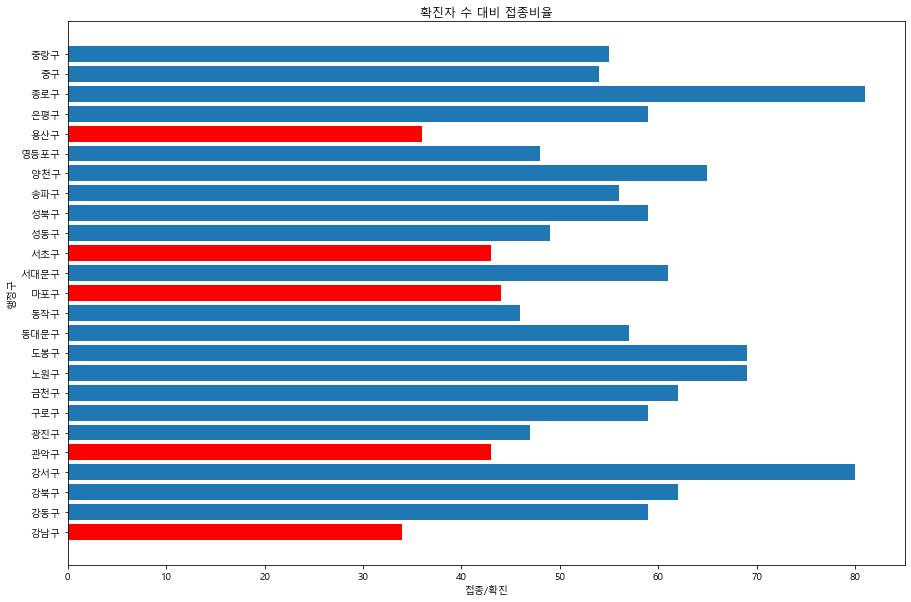

In [122]:
# 접종/확진 비율을 가로막대 형태로 시각화 하였다.
# 그 중 45를 기준으로 미달인 구역을 빨간 막대로 표시하였다.
# 그 결과 용산구, 서초구, 마포구, 강남구가 선별되었다.
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

x = vac_infect['접종/확진']
y = vac_infect.index
threshold = 45

below_threshold = x < threshold


plt.figure(figsize = (15, 10))
plt.barh(y, x)
plt.title('확진자 수 대비 접종비율')
plt.xlabel('접종/확진')
plt.ylabel('행정구')

plt.barh(y[below_threshold], x[below_threshold], color = 'red')

# 확진자와 교통량 비교하기

In [248]:
# 접종/확진이 저조한 5개의 행정구역을 선정하여 교통량 과의 상관관계를 살펴보았다.
import pandas as pd

# 행정구별 총 확진자 수
total_infect = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/전처리 후/행정구별 확진자 수.csv', encoding = 'cp949', index_col = 0)
total_infect.drop('총 확진자 수', axis = 'columns', inplace = True)
total_infect = total_infect.transpose()

total_infect.rename(columns = {'강남구':'강남_확진',
                               '관악구':'관악_확진',
                               '마포구':'마포_확진',
                               '서초구':'서초_확진',
                               '용산구':'용산_확진'}, inplace = True)

total_infect.index.name = '월'
total_infect

행정구,강남_확진,강동구,강북구,강서구,관악_확진,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산_확진,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1월,227,179,174,215,162,120,181,72,216,173,...,136,209,242,221,185,108,191,111,73,202
2월,118,161,124,96,182,155,237,69,186,140,...,119,208,209,140,181,236,163,44,88,167
3월,240,252,125,133,129,253,126,26,211,112,...,145,137,207,118,119,129,227,62,81,198
4월,428,253,133,217,313,238,142,84,259,178,...,184,207,382,174,210,111,339,66,64,334
5월,529,314,266,189,226,215,183,146,354,220,...,170,266,440,162,238,157,222,71,81,276
6월,792,284,164,213,268,236,160,103,239,107,...,238,232,429,186,269,251,213,65,78,183
7월,1249,523,348,576,1132,468,568,334,575,374,...,479,490,832,409,666,482,553,205,210,417
8월,1288,457,333,651,1001,532,629,375,403,250,...,370,517,928,602,841,441,720,233,255,534


In [249]:
# 월별 대중교통(버스 + 지하철) 이용량
pub_transport = pd.read_csv('C:/Users/SHON/Desktop/KDT/프로젝트/프로젝트 데이터/전처리 후/행정구별 월평균 대중교통 이용현황.csv', 
                            encoding = 'cp949',
                            index_col = 0)
pub_transport = pub_transport.transpose()
pub_transport.rename(columns = {'강남구':'강남_교통',
                               '관악구':'관악_교통',
                               '마포구':'마포_교통',
                               '서초구':'서초_교통',
                               '용산구':'용산_교통'}, inplace = True)
pub_transport.index.name = '월'
pub_transport

행정구,강남_교통,강동구,강북구,강서구,관악_교통,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산_교통,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1월,543695,185625,193428,262892,367745,199984,276197,149703,227203,146381,...,201512,240071,349205,177590,329920,165153,236510,293325,316552,165831
2월,598550,202629,211536,292112,402292,220657,298772,159571,250692,160126,...,222292,265667,382319,197080,366746,189339,261500,338052,352433,179742
3월,673813,226242,233657,327704,449879,247206,335172,176823,282767,177731,...,252290,302908,429353,219486,421077,216530,292569,388096,401586,201139
4월,681211,227326,238429,335104,457179,254386,341404,180563,289058,181144,...,261098,309686,436071,223117,425872,222800,299133,393658,412641,206363
5월,637519,214977,229140,318521,437626,246243,321890,168600,277078,173331,...,244958,296382,414969,211577,398899,214764,286379,378230,386485,196776
6월,702694,230041,240576,341149,465495,255035,347923,184213,293983,183664,...,264070,313006,445537,226740,430907,230482,305753,400823,421460,209739
7월,670107,222509,234858,329835,451561,250639,334907,176407,285531,178498,...,254514,304694,430253,219159,414903,222623,296066,389527,403973,203258
8월,686400,226275,237717,335492,458528,252837,341415,180310,289757,181081,...,259292,308850,437895,222949,422905,226553,300910,395175,412716,206498


In [258]:
# 월 별 5개의 행정구의 확진자와 교통량을 합쳐 하나의 데이터로 생성한다.
infect_pub= pd.concat([total_infect['강남_확진'],total_infect['관악_확진'],
                       total_infect['마포_확진'],total_infect['서초_확진'],total_infect['용산_확진'],
                       pub_transport['강남_교통'],pub_transport['관악_교통'],
                       pub_transport['마포_교통'],pub_transport['서초_교통'],
                       pub_transport['용산_교통']],
                       axis = 1)
infect_pub

,강남_확진,관악_확진,마포_확진,서초_확진,용산_확진,강남_교통,관악_교통,마포_교통,서초_교통,용산_교통
월,,,,,,,,,,
1월,227,162,155,142,108,543695,367745,304527,407356,165153
2월,118,182,99,108,236,598550,402292,349309,459005,189339
3월,240,129,105,162,129,673813,449879,389746,514345,216530
4월,428,313,172,360,111,681211,457179,394730,521355,222800
5월,529,226,165,265,157,637519,437626,383048,494345,214764
6월,792,268,270,353,251,702694,465495,409175,534579,230482
7월,1249,1132,641,777,482,670107,451561,396112,514462,222623
8월,1288,1001,713,675,441,686400,458528,402643,524521,226553


In [280]:
# 상관계수를 구한다.
infect_pub_corr = infect_pub.corr()
infect_pub_corr = infect_pub_corr.loc['강남_확진':'용산_확진', '강남_교통':'용산_교통']

<AxesSubplot:>

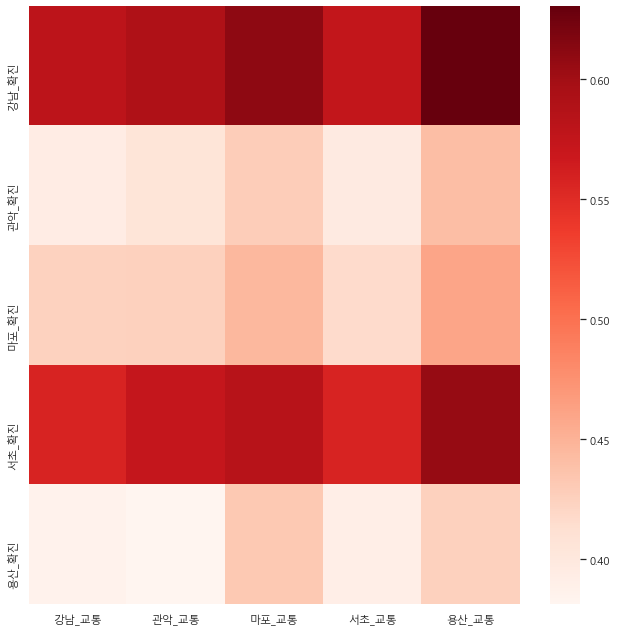

In [281]:
# 히트맵을 통해 조금 더 확연한 차이를 구분하고자 시각화하였다.
import seaborn as sns

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')


sns.heatmap(infect_pub_corr, cmap = 'Reds')